# Introduction
This notebook contains the steps to complete day 1 of Dashboarding with Notebooks tutorial by Rachael Tatman at Kaggle (https://www.kaggle.com/rtatman/dashboarding-with-notebooks-day-1).

# Dataset selection
This tutorial will be completed using data from the Meta Kaggle dataset (described and available for download here: https://www.kaggle.com/kaggle/meta-kaggle). This dataset is a nice combination of interesting and easy to work with - perhaps unsurprisingly, Kaggle maintains their datasets well.

# Data preparation
The Meta Kaggle dataset is downloaded and read into pandas.DataFrame.

## Download
Download the data using the Kaggle API and unzip.

In [1]:
# Download and unzip data.

## Read
Read the data files.

In [2]:
from pathlib import Path  # Easy-to-use, cross-platform path-to-file.

import numpy as np
import pandas as pd

In [3]:
path_to_data = Path('../input/meta-kaggle')
path_to_file = [p for p in path_to_data.glob('**/*')]  # List of filepaths.

# Print filenames.
for p in path_to_file:
    print(p.name)

KernelVersionDatasetSources.csv
UserOrganizations.csv
TeamMemberships.csv
KernelVersionKernelSources.csv
Competitions.csv
KernelVersions.csv
ForumMessageVotes.csv
.DS_Store
DatasourceObjects.csv
Teams.csv
Datasets.csv
ForumMessages.csv
KernelTags.csv
DatasourceVersionObjectTables.csv
Users.csv
ForumTopics.csv
UserAchievements.csv
Forums.csv
KernelVersionOutputFiles.csv
DatasetTags.csv
Tags.csv
Submissions.csv
KernelVersionCompetitionSources.csv
Organizations.csv
Kernels.csv
KernelVotes.csv
UserFollowers.csv
DatasetVersions.csv
KernelLanguages.csv
Datasources.csv
DatasetVotes.csv
CompetitionTags.csv


This notebook will focus on the competitions and users data. 

In [4]:
# Load users data.
users = pd.read_csv(path_to_data / 'Users.csv', parse_dates=['RegisterDate'], dayfirst=False)
users.head()

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
0,1,kaggleteam,Kaggle Team,2011-03-24,5
1,368,antgoldbloom,Anthony Goldbloom,2010-01-20,5
2,381,iguyon,Isabelle,2010-01-29,2
3,385,demonjosh,Demon Josh,2010-02-02,0
4,387,nicholasgruen,Nicholas Gruen,2010-02-02,0


In [5]:
# Load competitions data (takes a little while).
competitions = pd.read_csv(path_to_data / 'Competitions.csv', 
                           parse_dates=['EnabledDate', 'DeadlineDate', 'ProhibitNewEntrantsDeadlineDate'], 
                           dayfirst=False)
competitions.head()

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,EnabledDate,...,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions
0,2408,Eurovision2010,Forecast Eurovision Voting,This competition requires contestants to forec...,Featured,2.0,NaN,1,NaN,2010-04-07 07:57:43,...,False,False,USD,1000.0,1,1.0,False,22,25,22
1,8910,blg-454e-term-project-competition,BLG 454E Term Project Competition,"ITU Computer and Informatics Faculty, BLG 454E...",InClass,24780.0,NaN,1,NaN,2018-03-17 19:08:56,...,False,False,NaN,0.0,0,0.0,False,29,65,658
2,8916,test-xx,test-xx,this is a test,InClass,24867.0,NaN,1,NaN,2018-03-18 11:52:38,...,False,False,NaN,0.0,0,0.0,False,0,0,7
3,8933,recsys-20181-cfmr,RecSys 2018/1: Collaborative Movie Recommendation,Predict users' ratings for movies,InClass,25077.0,NaN,1,NaN,2018-03-19 15:34:50,...,False,False,NaN,0.0,0,0.0,False,27,28,737
4,8866,bonus-410-spring-2018,Bonus 410 Spring 2018,A competition to help you start using the trai...,InClass,24237.0,NaN,1,NaN,2018-03-14 18:08:58,...,False,False,NaN,0.0,0,0.0,False,11,11,66


# Visualisation

In [6]:
import matplotlib.pyplot as plt  # Quick plotting.
import seaborn  # Make plotting better.
%matplotlib inline

The following plot shows the number of new users on each day as a time-series.

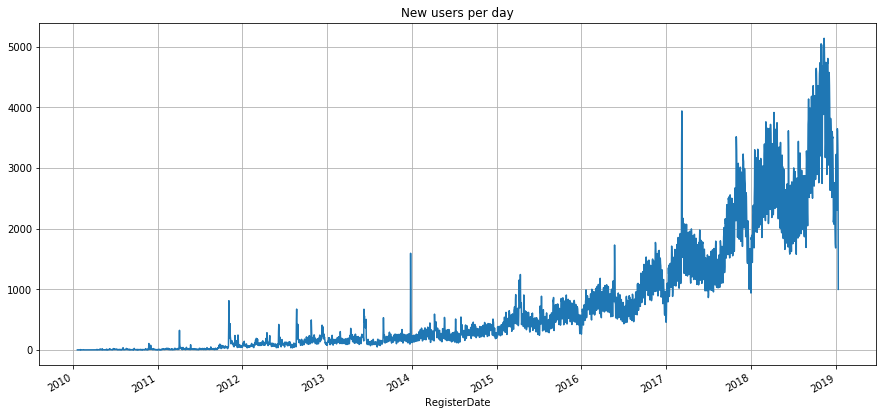

In [7]:
# Group by RegisterDate and count unique Id values.
new_users_per_day = users.groupby('RegisterDate').agg({'Id': 'nunique'}).rename({'Id': 'NewUsers'}, axis=1)

new_users_per_day.plot(title='New users per day', figsize=(15, 7), grid=True, legend=False)

The rate of users signing has been accelerating since Kaggles inception in 2010. In the latter stages there is evidence of seasonal effects, with a noticeable peak in either half of the year. Kaggle could use this information to anticipate future demand on their service and plan appropriately.

The next figure shows a bar chart of the median number of competitors for different reward types. Note that the average is used rather than the sum to control for the differing frequencies of competitions with each reward type (i.e. the vast majority of competitions offer cash rewards, which drives up the number of competitors); the median is used rather than the median to control for certain competitons (such as the introductory/tutorial competitions) having extremely large numbers of competitors.

Text(0,0.5,'Median number of competitors')

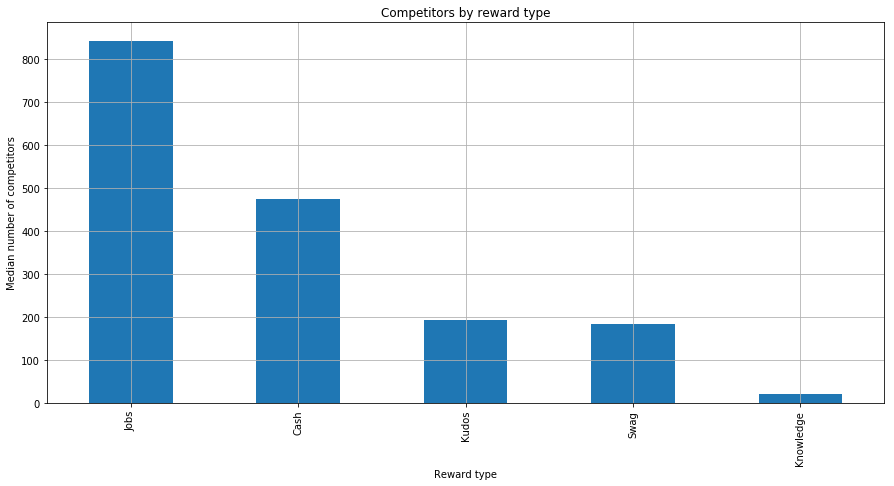

In [8]:
# Replace USD & EUR --> Cash.
competitions.replace(['USD', 'EUR'], 'Cash', inplace=True)

# Median number of competitors for each reward type.
rewardtype_vs_competitors = competitions.groupby('RewardType').agg({'TotalCompetitors': 'median'})
rewardtype_vs_competitors.sort_values(by='TotalCompetitors', ascending=False, inplace=True)

ax = rewardtype_vs_competitors.plot(title='Competitors by reward type', 
                                    figsize=(15, 7), grid=True, legend=False, kind='bar')
ax.set_xlabel('Reward type')
ax.set_ylabel('Median number of competitors')

Apparently, Kaggle competitors are much more likely to compete when there are jobs on offer rather than other reward types. Sadly it would appear the worst reward for increasing the number of competitors is knowledge. This information could be useful for competition organizers to understand the best way of motivating people to participate.